In [3]:
# Librerias
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.tools import eval_measures


In [4]:
# leemos el dataset limpio y eliminamos columnas que no vamos a usar
filename = "../dataset/capital.csv"
data = pd.read_csv(filename, sep=',')
data.drop([data.columns[0],"numero","description", "price_usd_per_m2", "price_aprox_local_currency","price_per_m2" ,"title", "property_type"], axis=1,inplace=True)
display(data.sample(n=2))
print(f"(Cantidad de Filas, Cantidad de columnas) -> {data.shape}")


,place_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,piscina,Parrilla,Cochera,nuevo
6495,San Telmo,132402,52,47,6,2,0,1,1,1,0
8283,Caballito,180000,57,55,3,3,0,0,0,1,0


(Cantidad de Filas, Cantidad de columnas) -> (16938, 11)


# Dataset

El dataset ya se encuentra limpio, y cuenta con 16938 Propiedades de Capital Federal.

**Campos**
<pre>
place_name:                Barrio
price_aprox_usd:           Precio en dolares. Variable Target
surface_total_in_m2:       Metros cuadrados totales de la propiedad
surface_covered_in_m2:     Metros cuadrados cubiertos de la propiedad
floor:                     Piso en que se encuentra la propiedad.
rooms:                     Habitaciones de la propiedad
expenses:                  Valor de las Expensas en pesos
piscina:                   Si tiene pisina (0: No tiene, 1: Tiene)
Parrilla:                  Si tiene parrilla (0: No tiene, 1: Tiene)
Cochera:                   Si tiene cochera (0: No tiene, 1: Tiene)
nuevo:                     Si es nuevo (0: no es nuevo, 1: es nuevo)
</pre>

`place_name` es una Variable categorica,hay que crear variables dummies.
`surface_total_in_m2`, `surface_covered_in_m2`, `floor`, `rooms` y `expenses` son variables continuas, y hay que estandarizarlas para llevarlas al intevalo 0-1.


Paso 1:
Normalizamos los campos y creemos las variables dummies necesarias para poder entrenar un modelo de regresión para predecir el valor de `price_aprox_usd` para cada registro.

No usamos el método `get_dummies` porque......


In [5]:
categoricals = ['place_name']

enc = OneHotEncoder(drop='first')
X = data[categoricals]
enc.fit(X)
enc.categories_

[array(['Abasto', 'Agronomía', 'Almagro', 'Balvanera', 'Barracas',
        'Barrio Norte', 'Belgrano', 'Boca', 'Boedo', 'Caballito',
        'Capital Federal', 'Catalinas', 'Centro / Microcentro',
        'Chacarita', 'Coghlan', 'Colegiales', 'Congreso', 'Constitución',
        'Flores', 'Floresta', 'Las Cañitas', 'Liniers', 'Mataderos',
        'Monserrat', 'Monte Castro', 'Nuñez', 'Once', 'Palermo',
        'Palermo Chico', 'Palermo Hollywood', 'Palermo Soho',
        'Palermo Viejo', 'Parque Avellaneda', 'Parque Centenario',
        'Parque Chacabuco', 'Parque Chas', 'Parque Patricios', 'Paternal',
        'Pompeya', 'Puerto Madero', 'Recoleta', 'Retiro', 'Saavedra',
        'San Cristobal', 'San Nicolás', 'San Telmo', 'Tribunales',
        'Velez Sarsfield', 'Versalles', 'Villa Crespo', 'Villa Devoto',
        'Villa General Mitre', 'Villa Lugano', 'Villa Luro',
        'Villa Ortuzar', 'Villa Pueyrredón', 'Villa Real',
        'Villa Riachuelo', 'Villa Santa Rita', 'Villa Soldati'

In [6]:
dummies = enc.transform(X).toarray()
dummies

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
dummies.shape

(16938, 61)

In [8]:
# Convertimos en dataframe por comodidad.
dummies_df = pd.DataFrame(dummies)
dummies_df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


ddd

In [9]:
col_names = [categoricals[i] + '_' + enc.categories_[i] for i in range(len(categoricals)) ]
col_names_drop_first = [sublist[i] for sublist in col_names for i in range(len(sublist)) if i != 0]
dummies_df.columns = col_names_drop_first
dummies_df

,place_name_Agronomía,place_name_Almagro,place_name_Balvanera,place_name_Barracas,place_name_Barrio Norte,place_name_Belgrano,place_name_Boca,place_name_Boedo,place_name_Caballito,place_name_Capital Federal,...,place_name_Villa Lugano,place_name_Villa Luro,place_name_Villa Ortuzar,place_name_Villa Pueyrredón,place_name_Villa Real,place_name_Villa Riachuelo,place_name_Villa Santa Rita,place_name_Villa Soldati,place_name_Villa Urquiza,place_name_Villa del Parque
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Paso 2:
Estandarizamos los campos numéricos `surface_total_in_m2`, `surface_covered_in_m2`, `floor`, `rooms` y `expenses`.

In [10]:
numericals = ['surface_total_in_m2', 'surface_covered_in_m2', 'floor', 'rooms', 'expenses']

X = data[numericals]

scaler = MinMaxScaler()
scaler.fit(X)

std_numerical_data = scaler.transform(X)
std_df = pd.DataFrame(std_numerical_data)
std_df.columns = [i + '_std' for i in numericals]
std_df

,surface_total_in_m2_std,surface_covered_in_m2_std,floor_std,rooms_std,expenses_std
0,0.009591,0.005567,0.074074,0.15,0.0
1,0.035623,0.009035,0.037037,0.15,0.0
2,0.108696,0.036415,0.037037,0.10,0.0
3,0.044757,0.009492,0.037037,0.05,0.0
4,0.017355,0.004928,0.037037,0.15,0.0
...,...,...,...,...,...
16933,0.018634,0.019440,0.148148,0.20,0.0
16934,0.037450,0.036871,0.333333,0.25,0.0
16935,0.018634,0.019440,0.000000,0.20,0.0
16936,0.018634,0.019440,0.148148,0.20,0.0


Ahora nuestro dataset de features serán las variables dummies y las variables numéricas estandarizadas

In [11]:
X = pd.concat([dummies_df, std_df], axis = 1)
X

,place_name_Agronomía,place_name_Almagro,place_name_Balvanera,place_name_Barracas,place_name_Barrio Norte,place_name_Belgrano,place_name_Boca,place_name_Boedo,place_name_Caballito,place_name_Capital Federal,...,place_name_Villa Riachuelo,place_name_Villa Santa Rita,place_name_Villa Soldati,place_name_Villa Urquiza,place_name_Villa del Parque,surface_total_in_m2_std,surface_covered_in_m2_std,floor_std,rooms_std,expenses_std
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.009591,0.005567,0.074074,0.15,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.035623,0.009035,0.037037,0.15,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.108696,0.036415,0.037037,0.10,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.044757,0.009492,0.037037,0.05,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.017355,0.004928,0.037037,0.15,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.018634,0.019440,0.148148,0.20,0.0
16934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.037450,0.036871,0.333333,0.25,0.0
16935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.018634,0.019440,0.000000,0.20,0.0
16936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.018634,0.019440,0.148148,0.20,0.0


La variable target es `price_aprox_usd`

In [12]:
y = data.price_aprox_usd

Paso 3:
Separamos el conjunto train y test.
* Spliteamos el dataframe el dataframe construido, con las variables dummies y estandarizadas.
* El tamaño del conjunto de datos lo definimos en 30% de los datos.
* fijamos la semilla de los nímeros aleatoaleatoriosrios.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 117)

Paso 4:
Ajustemos una regresión lineal múltiple con los datos del conjunto de entrenamiento usando statsmodels y evaluemos la significancia de cada uno de los coeficientes

In [14]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        price_aprox_usd   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     37.90
Date:                Sat, 05 Nov 2022   Prob (F-statistic):               0.00
Time:                        05:04:51   Log-Likelihood:            -1.7414e+05
No. Observations:               11856   AIC:                         3.484e+05
Df Residuals:                   11789   BIC:                         3.489e+05
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -2.701e+04   8.44e+04     -0.320      0.749   -1.93e+05    1.38e+05
place_name_Agronomía            -7401.5192   2.02e+05     -0.037      0.971   -4.03e+05    3.88e+05
place_name_Almagro               6.847e+04   8.82e+04      0.776      0.438   -1.05e+05    2.41e+05
place_name_Balvanera            -2.541e+04   9.22e+04     -0.276      0.783   -2.06e+05    1.55e+05
place_name_Barracas               -1.7e+04   9.59e+04     -0.177      0.859   -2.05e+05    1.71e+05
place_name_Barrio Norte          1.465e+05   8.89e+04      1.648      0.099   -2.77e+04    3.21e+05
place_name_Belgrano              3.374e+05   8.57e+04      3.939      0.000     1.7e+05    5.05e+05
place_name_Boca                 -6545.9050   1.05e+05     -0.062      0.950   -2.13e+05    1.99e+05
place_name_Boedo                 3.295e+05   8.76e+04      3.760      0.000    1.58e+05    5.01e+05
place_name_Caballito              2.94e+04   8.62e+04      0.341      0.733    -1.4e+05    1.98e+05
place_name_Capital Federal      -2.732e+04      9e+04     -0.304      0.761   -2.04e+05    1.49e+05
place_name_Catalinas             5.282e+04   5.87e+05      0.090      0.928    -1.1e+06     1.2e+06
place_name_Centro / Microcentro  3.597e+04   1.03e+05      0.350      0.726   -1.65e+05    2.37e+05
place_name_Chacarita              6.42e+04   1.01e+05      0.638      0.523   -1.33e+05    2.61e+05
place_name_Coghlan               3.739e+04   1.01e+05      0.369      0.712   -1.61e+05    2.36e+05
place_name_Colegiales            1.719e+05   9.68e+04      1.776      0.076   -1.78e+04    3.62e+05
place_name_Congreso              1.539e+04   1.01e+05      0.152      0.879   -1.83e+05    2.14e+05
place_name_Constitución          1.997e+04   1.03e+05      0.195      0.846   -1.81e+05    2.21e+05
place_name_Flores                7.237e+04   8.71e+04      0.831      0.406   -9.83e+04    2.43e+05
place_name_Floresta             -5.899e+04   9.77e+04     -0.604      0.546   -2.51e+05    1.33e+05
place_name_Las Cañitas           1.465e+05   1.13e+05      1.293      0.196   -7.56e+04    3.69e+05
place_name_Liniers              -2.754e+04   1.01e+05     -0.273      0.785   -2.26e+05    1.71e+05
place_name_Mataderos            -5.989e+04    9.7e+04     -0.617      0.537    -2.5e+05     1.3e+05
place_name_Monserrat             2.057e+04   9.96e+04      0.207      0.836   -1.75e+05    2.16e+05
place_name_Monte Castro           -3.2e+04   1.41e+05     -0.226      0.821   -3.09e+05    2.45e+05
place_name_Nuñez                 3.959e+05   9.13e+04      4.338      0.000    2.17e+05    5.75e+05
place_name_Once                 -1.277e+04   1.11e+05     -0.115      0.909   -2.31e+05    2.05e+05
place_name_Palermo               1.908e+05   8.59e+04      2.220      0.026    2.23

Se ven muchos campos un un p-value muy alto. por lo tanto no podemos rechazar la hipótesis nula que dice que los coeficientes de esas dos variables son 0.


In [15]:
no_reg_model_params = model.params

Para este modelo de regresion lineal multiple, calculamos el error cuadratico en train y test.

In [16]:
sm_prediction_train = model.predict(X_train_sm)
print(eval_measures.rmse(y_train, sm_prediction_train))

X_test_sm = sm.add_constant(X_test)
sm_prediction_test = model.predict(X_test_sm)
print(eval_measures.rmse(y_test, sm_prediction_test))

579031.6455226907
453371.455223938


Vemos que pareciera no estar bien entrenado, ya que los resultados no son parecidos.

Por otra parte, vimos que el `R-squared` y el `R-squared ajustado` dieron muy bajos, por lo que creemos que usando regularizaciòn podrìamos arreglar este problema.
<pre>
R-squared:	0.175
Adj. R-squared:	0.170
</pre>

Paso 5:

Ajustamos el modelo aplicando regularización de Lasso y validación cruzada para estimar el mejor valor de $\alpha$ para este problema

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
# Definimos el rango de de búsqueda del hiperparametro explicitamente
# normalize = False, porque ya normalizamos.
# cv=5 -> Dividimos el entrenamiento en 5.
lm_lasso = linear_model.LassoCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10, 15, 30, 40, 50, 100],\
                                        normalize=False, cv=5) 

model_cv = lm_lasso.fit(X_train, y_train)

model_cv.score(X_train, y_train)

0.1749637382657555

In [19]:
model_cv.coef_

array([-0.00000000e+00,  3.85042752e+04, -5.11816788e+04, -4.21875500e+04,
        1.17321142e+05,  3.08791013e+05, -2.88645993e+04,  2.98873729e+05,
        0.00000000e+00, -5.32180600e+04,  0.00000000e+00,  3.61727804e+03,
        3.04555272e+04,  3.67656201e+03,  1.39749307e+05, -8.98387167e+03,
       -4.39476535e+03,  4.29725520e+04, -8.35288212e+04,  1.10108371e+05,
       -5.15463821e+04, -8.43851369e+04, -3.03825020e+03, -4.23434081e+04,
        3.65628657e+05, -3.25804357e+04,  1.61793075e+05,  7.37453847e+05,
        7.79721545e+04,  6.01937825e+04,  1.90725804e+05, -7.57490082e+04,
       -3.18886033e+04, -1.87976523e+04, -0.00000000e+00, -8.22966068e+04,
        5.55624640e+04, -1.26251969e+05,  6.73400854e+05,  2.01039720e+05,
        1.18994440e+05,  2.52439185e+04,  3.37959565e+05, -0.00000000e+00,
        2.35718648e+05,  9.30004497e+03, -4.00134831e+04, -5.05313286e+04,
        3.95233404e+04,  1.35772836e+04, -5.41567031e+04, -1.28072377e+05,
        1.25259604e+04,  

In [20]:
model_cv.intercept_

4377.597733589413

In [21]:
model_cv.alpha_

40.0

Se planteron todos los valores de alfa posibles,
Como dividimos el entrenamiento en 5, se calcula el error cuadratico promedio de los 5 entrenamientos, y obtenemos el Alfa.
Ahora chequeamos que el resultado no sea uno de los valores extremos: En este caso, `0.1750431565177899` no es extremo, por lo que lo tomamos como válido y vamos a confiar en ese alfa

In [22]:
model_cv.score(X_train, y_train)

0.1749637382657555

Paso 6:

Ajustemos los datos de entrenamiento con una regresión con regularización de Lasso para el valor de $\alpha$ calculado en el punto anterior usando statsmodels.

Usemos scatterplots para mostrar 

* los valores de los coeficientes de la regresión lineal múltiple obtenidos en el Paso 3, y los valores de los coeficientes de la regresión lineal con regularización de Lasso para el modelo entrenado.

* los valores de los residuos en entrenamiento resultado del Paso 3, y los residuos en entrenamiento para el modelo con regularización.

In [23]:
best_alpha = model_cv.alpha_

#L1_wt : 0, the fit is ridge regression. 1, the fit is the lasso 

no_reg_model = sm.OLS(y_train, X_train_sm)

reg_model = no_reg_model.fit_regularized(alpha = best_alpha, L1_wt = 1)

In [24]:
reg_model.params

const                        5.723565e+04
place_name_Agronomía        -3.860416e+04
place_name_Almagro          -9.609589e+03
place_name_Balvanera        -1.009180e+05
place_name_Barracas         -9.218897e+04
                                 ...     
surface_total_in_m2_std      5.781078e+06
surface_covered_in_m2_std    7.555606e+06
floor_std                    2.121487e+05
rooms_std                    6.227918e+05
expenses_std                 0.000000e+00
Length: 67, dtype: float64

Acá vemos que lasso hizo cero, elimino la variable expensas, ya que cree que no es buena para el modelo.

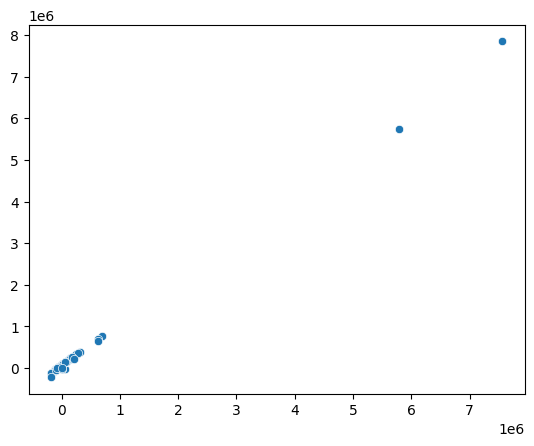

In [25]:
sns.scatterplot(x=reg_model.params, y=no_reg_model_params);

<AxesSubplot: >

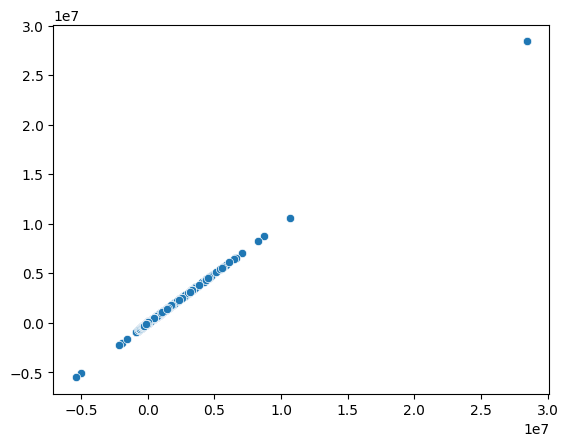

In [26]:
reg_residuals = y_train - reg_model.fittedvalues
linear_residuals = y_train - model.fittedvalues
sns.scatterplot(x = reg_residuals, y = linear_residuals)

Paso 7:

Usamos statsmodels y scikit-learn para calcular la performance en test del modelo construído y comparemos los resultados de las dos bibliotecas usando como métricas el error absoluto medio (MAE) y la raiz del error cuadrático medio (RMSE) 

In [27]:
sm_prediction = reg_model.predict(X_test_sm)
sm_prediction

1750     345702.472429
15074    158831.698468
9561     433050.606607
6380     421452.545873
15434    227275.164650
             ...      
1209     248052.081452
3846     604252.940967
9875     300309.287747
5790     158316.563491
12945    283878.057472
Length: 5082, dtype: float64

<AxesSubplot: xlabel='price_aprox_usd'>

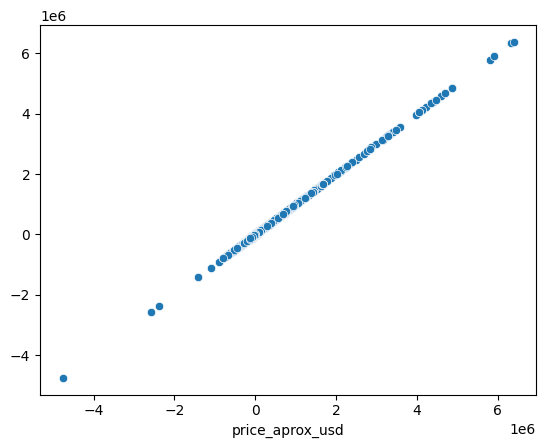

In [28]:
skl_lasso = linear_model.Lasso(alpha = best_alpha, fit_intercept=True, normalize=False)
skl_lasso = skl_lasso.fit(X= X_train, y = y_train)
skl_prediction = skl_lasso.predict(X_test)

skl_residuals = y_test - skl_prediction
sm_residuals = y_test - sm_prediction
sns.scatterplot(x = skl_residuals, y = sm_residuals)

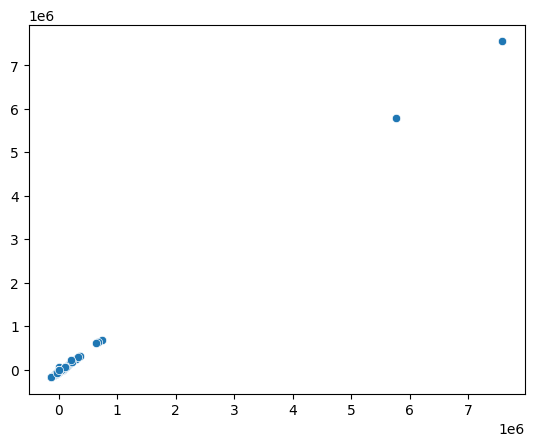

In [29]:
lasso_coef = np.insert(skl_lasso.coef_, 0, skl_lasso.intercept_)
sns.scatterplot(x = lasso_coef, y = reg_model.params);

In [30]:
lasso_coef

array([ 4.37759773e+03, -0.00000000e+00,  3.85042752e+04, -5.11816788e+04,
       -4.21875500e+04,  1.17321142e+05,  3.08791013e+05, -2.88645993e+04,
        2.98873729e+05,  0.00000000e+00, -5.32180600e+04,  0.00000000e+00,
        3.61727804e+03,  3.04555272e+04,  3.67656201e+03,  1.39749307e+05,
       -8.98387167e+03, -4.39476535e+03,  4.29725520e+04, -8.35288212e+04,
        1.10108371e+05, -5.15463821e+04, -8.43851369e+04, -3.03825020e+03,
       -4.23434081e+04,  3.65628657e+05, -3.25804357e+04,  1.61793075e+05,
        7.37453847e+05,  7.79721545e+04,  6.01937825e+04,  1.90725804e+05,
       -7.57490082e+04, -3.18886033e+04, -1.87976523e+04, -0.00000000e+00,
       -8.22966068e+04,  5.55624640e+04, -1.26251969e+05,  6.73400854e+05,
        2.01039720e+05,  1.18994440e+05,  2.52439185e+04,  3.37959565e+05,
       -0.00000000e+00,  2.35718648e+05,  9.30004497e+03, -4.00134831e+04,
       -5.05313286e+04,  3.95233404e+04,  1.35772836e+04, -5.41567031e+04,
       -1.28072377e+05,  

In [31]:
reg_model.params

const                        5.723565e+04
place_name_Agronomía        -3.860416e+04
place_name_Almagro          -9.609589e+03
place_name_Balvanera        -1.009180e+05
place_name_Barracas         -9.218897e+04
                                 ...     
surface_total_in_m2_std      5.781078e+06
surface_covered_in_m2_std    7.555606e+06
floor_std                    2.121487e+05
rooms_std                    6.227918e+05
expenses_std                 0.000000e+00
Length: 67, dtype: float64

Métricas en `statsmodels`

In [32]:
eval_measures.rmse(y_test, sm_prediction)

453436.5732613321

In [33]:
eval_measures.meanabs(y_test, sm_prediction)

201282.25238591828

In [34]:
# de scikit-learn
metrics.r2_score(y_test, sm_prediction)

0.33076296295945573

Métricas en `scikit-learn`


In [35]:
np.sqrt(metrics.mean_squared_error(y_test, skl_prediction))

453283.30753475585

In [36]:
metrics.mean_absolute_error(y_test, skl_prediction)

200827.46135170208

In [37]:
metrics.r2_score(y_test, skl_prediction)

0.3312153030299053

In [39]:
o = data[:20][['place_name', 'price_aprox_usd']]
p = skl_lasso.predict(X_test[:20])
for idx in range(len(p)):
    print(f'Localidad: {o.place_name[idx]:<25}Precio dataset: {o.price_aprox_usd[idx]:<8}Precio predecido:{p[idx]:<25}Diferencia: {p[idx]-o.price_aprox_usd[idx]:.0f}')

Localidad: Capital Federal          Precio dataset: 16100   Precio predecido:345401.6820968104        Diferencia: 329302
Localidad: Boca                     Precio dataset: 125000  Precio predecido:159409.34419743437       Diferencia: 34409
Localidad: Capital Federal          Precio dataset: 390000  Precio predecido:432103.97860753513       Diferencia: 42104
Localidad: Nuñez                    Precio dataset: 170000  Precio predecido:420029.73298125475       Diferencia: 250030
Localidad: Floresta                 Precio dataset: 75000   Precio predecido:225877.37872647512       Diferencia: 150877
Localidad: Centro / Microcentro     Precio dataset: 145818  Precio predecido:189248.6399512644        Diferencia: 43431
Localidad: Villa Lugano             Precio dataset: 24300   Precio predecido:386184.6940942228        Diferencia: 361885
Localidad: Villa Crespo             Precio dataset: 195000  Precio predecido:129383.19787019808       Diferencia: -65617
Localidad: Capital Federal         

In [40]:
o = data[['place_name', 'price_aprox_usd']]
p = skl_lasso.predict(X_test)
for idx in range(len(p)):
    if abs(p[idx] - o.price_aprox_usd[idx])<5000:
        print(f'Localidad: {o.place_name[idx]:<25}Precio dataset: {o.price_aprox_usd[idx]:<8}Precio predecido:{p[idx]:<25}Diferencia: {p[idx]-o.price_aprox_usd[idx]:.0f}')

Localidad: Villa Luro               Precio dataset: 180000  Precio predecido:179459.27907921487       Diferencia: -541
Localidad: San Telmo                Precio dataset: 335000  Precio predecido:333599.44439389656       Diferencia: -1401
Localidad: Once                     Precio dataset: 99000   Precio predecido:94400.96767283535        Diferencia: -4599
Localidad: Tribunales               Precio dataset: 270000  Precio predecido:273177.2137641103        Diferencia: 3177
Localidad: Barracas                 Precio dataset: 78000   Precio predecido:74991.8350971466         Diferencia: -3008
Localidad: San Telmo                Precio dataset: 77000   Precio predecido:78387.77926030885        Diferencia: 1388
Localidad: Centro / Microcentro     Precio dataset: 184813  Precio predecido:185776.70548975235       Diferencia: 964
Localidad: Centro / Microcentro     Precio dataset: 98000   Precio predecido:102978.20372182566       Diferencia: 4978
Localidad: Palermo                  Precio dat